# Atividade Prática 1

Nessa atividade iremos dar os primeiros passos 
para a tarefa de clustering (aprendizado não-supervisionado)
é esperado que ao término dessa prática se tenha as seguintes habilidades:

* Análise exploratória a partir de uma gráfico de dispersão;
* Execução do algoritmo k-means através da lib sklearn;
* Análise dos clusters gerados

## passo 1: import das libs necessárias

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn import metrics

from sklearn.cluster import KMeans

## passo 2: carregar o dataset

Obs: iremos considerar X sendo nosso dataset e y_true o que seriam as classes dos dados

In [2]:
X, y_true = make_blobs(
    n_samples=100, n_features=2, centers=4, cluster_std=0.4, random_state=0
)

# os dados foram carregados em um formato matricial numpy, 
# porém para facilitar as análises precisaremos converter para um
# tipo pandas DataFrame
X = pd.DataFrame(X)

X.head()

,0,1
0,0.771948,3.831534
1,-1.765399,7.942280
2,1.280685,4.352457
3,1.038249,4.455052
4,1.468386,4.784739


## passo 3: análise exploratória do dataset

dimensões do dataset (exemplos, features):  (100, 2)

as estatísticas básicas dos dados: 
                0           1
count  100.000000  100.000000
mean     0.046855    4.032004
std      1.534099    2.519609
min     -2.123407    0.207151
25%     -1.413324    2.277369
50%     -0.213944    3.669748
75%      1.576931    5.549598
max      2.808528    8.607273

dispersão dos dados:


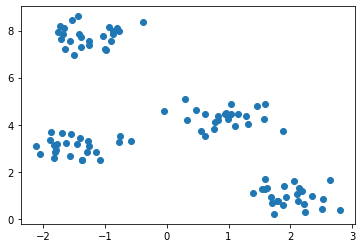

In [3]:
print("dimensões do dataset (exemplos, features): ", X.shape)
print("\nas estatísticas básicas dos dados: ")
print(X.describe())


print("\ndispersão dos dados:")
eixo_x = X.iloc[:,0]
eixo_y = X.iloc[:,1]
plt.scatter(eixo_x, eixo_y)
plt.show()

## passo 4: execução do k-means

In [4]:
X.head(5)

,0,1
0,0.771948,3.831534
1,-1.765399,7.942280
2,1.280685,4.352457
3,1.038249,4.455052
4,1.468386,4.784739


In [5]:
%%time
model = KMeans(n_clusters=4).fit(X)

# indicação dos grupos para cada exemplo do meu conjunto de dados
y_predict = model.labels_

print(y_predict)

[0 2 0 0 0 0 3 2 0 2 2 2 2 2 2 1 1 3 3 1 0 2 3 1 0 3 3 0 1 1 1 2 1 1 3 0 2
 1 2 3 0 3 2 3 3 2 1 3 0 0 0 1 3 3 3 2 2 1 1 2 2 1 1 0 1 2 3 3 1 0 2 1 0 2
 0 0 3 3 1 1 1 2 3 0 1 3 1 1 0 0 0 3 0 3 3 2 2 3 2 0]
CPU times: user 38.5 ms, sys: 2.92 ms, total: 41.5 ms
Wall time: 35.1 ms


In [6]:
model.cluster_centers_
# y_predict == 0

array([[ 0.93588159,  4.3205638 ],
       [ 2.00454873,  0.9520213 ],
       [-1.26414502,  7.77811813],
       [-1.48886624,  3.07731162]])

## passo 5: avaliação do k-means

Silhueta:  0.7697826124517921
NMI:  1.0


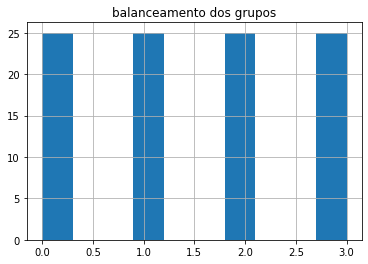

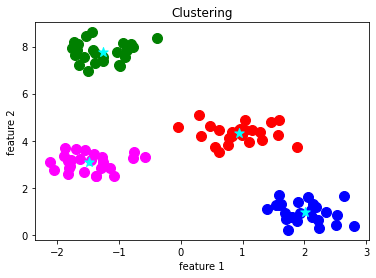

In [7]:
sil = metrics.silhouette_score(X, y_predict, metric='euclidean')
nmi = metrics.adjusted_mutual_info_score(y_true, y_predict)

print("Silhueta: ", sil)
print("NMI: ", nmi)

# check como ficou o balanceamento
_ = pd.DataFrame(y_predict).hist()
plt.title('balanceamento dos grupos')
plt.show()


plt.scatter(X.iloc[y_predict==0, 0], X.iloc[y_predict==0, 1], s=100, c='red')
plt.scatter(X.iloc[y_predict==1, 0], X.iloc[y_predict==1, 1], s=100, c='blue')
plt.scatter(X.iloc[y_predict==2, 0], X.iloc[y_predict==2, 1], s=100, c='green')
plt.scatter(X.iloc[y_predict==3, 0], X.iloc[y_predict==3, 1], s=100, c='magenta')

eixo_x = model.cluster_centers_[:, 0]
eixo_y = model.cluster_centers_[:, 1]

plt.scatter(eixo_x, eixo_y, s=100, c='cyan', marker='*')

plt.title('Clustering')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.show()